# 9.2.2 Exponential Smoothing

## Explanation of Exponential Smoothing
Exponential Smoothing is a time series forecasting technique that applies weighted averages to past observations, with the weights decaying exponentially as the observations get older. Unlike the Simple Moving Average, which assigns equal weights to all past observations within a window, Exponential Smoothing assigns higher weights to more recent observations. This makes the method more responsive to changes in the data.

There are different types of Exponential Smoothing methods, such as:
- **Simple Exponential Smoothing (SES)**: Best for time series data without a trend or seasonal component.
- **Double Exponential Smoothing (Holt's Linear Method)**: Suitable for data with a trend.
- **Triple Exponential Smoothing (Holt-Winters Method)**: Suitable for data with both trend and seasonality.

The basic formula for Simple Exponential Smoothing is:
$$ S_t = \alpha \cdot X_t + (1 - \alpha) \cdot S_{t-1} $$
Where:
- $S_t$ is the smoothed value at time $t$
- $X_t$ is the actual value at time $t$
- $\alpha$ is the smoothing factor (0 < $\alpha$ < 1)

## Benefits and Scenarios for Using Exponential Smoothing
Exponential Smoothing is beneficial in several scenarios:
1. **Recent Data Emphasis**: Since it gives more weight to recent observations, it is particularly useful when the most recent data is more relevant for forecasting.
2. **Adaptability**: It can adapt to various types of time series data (e.g., with or without trend/seasonality) by choosing the appropriate model (SES, Holt’s, Holt-Winters).
3. **Simplicity and Efficiency**: Despite its simplicity, Exponential Smoothing can be very effective and computationally efficient, making it ideal for real-time forecasting in business and industry.



___
___
### Readings:
- [Introduction to Time Series Forecasting: Smoothing Methods](https://medium.com/codex/introduction-to-time-series-forecasting-smoothing-methods-9a904c00d0fd)
- [Time Series Analysis with Exponential Smoothing](https://chrisgrannan.medium.com/time-series-analysis-with-exponential-smoothing-d3ad82d47ab0)
- [Mastering Exponential Smoothing Models for Time Series Forecasting](https://medium.com/@data-overload/mastering-exponential-smoothing-models-for-time-series-forecasting-b920d1c15655)
___
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Load the Air Passengers dataset
data = get_rdataset('AirPassengers', 'datasets')
df = data.data

In [3]:
# Create a DateTime index
start_date = '1949-01-01'
df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='M')
df.set_index('Date', inplace=True)

In [4]:
# Apply Exponential Smoothing
model = ExponentialSmoothing(df['value'], trend='add', seasonal='add',freq='M', seasonal_periods=12)
fitted_model = model.fit()

In [5]:
# Generate forecasts
df['Forecast'] = fitted_model.fittedvalues

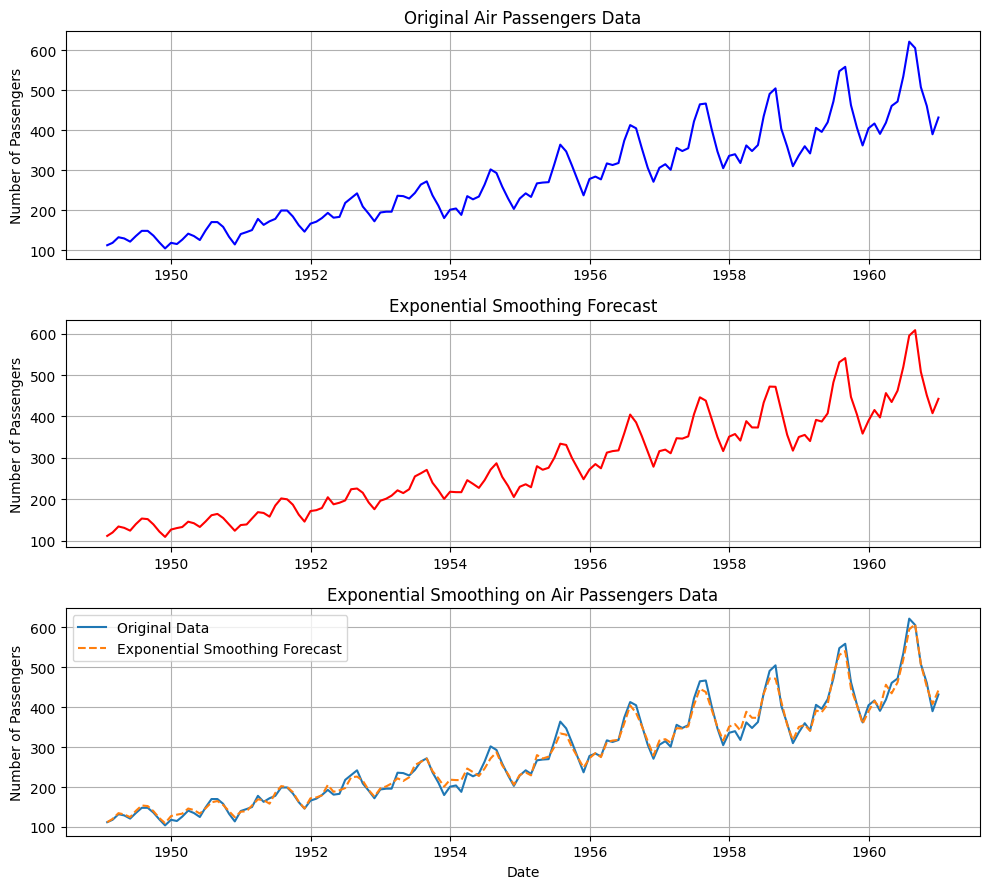

In [6]:
# Plotting
plt.figure(figsize=(10, 9))

# Plot Original Data
plt.subplot(3, 1, 1)
plt.plot(df.index, df['value'], color='blue')
plt.title('Original Air Passengers Data')
plt.ylabel('Number of Passengers')
plt.grid(True)

# Plot Simple Moving Average
plt.subplot(3, 1, 2)
plt.plot(df.index, df['Forecast'], color='red')
plt.title('Exponential Smoothing Forecast')
plt.ylabel('Number of Passengers')
plt.grid(True)

# Plot Original Data and SMA
plt.subplot(3, 1, 3)
plt.plot(df['value'], label='Original Data')
plt.plot(df['Forecast'], label='Exponential Smoothing Forecast', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing on Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion

In this analysis, we applied Exponential Smoothing to the Air Passengers dataset to forecast future passenger numbers. The Exponential Smoothing method, which incorporates both trend and seasonality components, effectively captures the underlying patterns in the data.

**Key Takeaways:**

1. **Original Data Visualization**: The first subplot provides a clear view of the original Air Passengers data, showing the fluctuation in passenger numbers over time.

2. **Forecast Visualization**: The second subplot demonstrates the Exponential Smoothing forecast. This forecast closely follows the trend and seasonal patterns observed in the original data.

3. **Comparison Plot**: The third subplot overlays the original data with the forecasted values, offering a direct comparison between the observed and predicted passenger numbers. This visual comparison highlights the model's ability to capture the key features of the data, including trends and seasonality.

Overall, Exponential Smoothing is a robust method for time series forecasting, particularly for data with clear seasonal and trend components. Its application to the Air Passengers dataset showcases its effectiveness in predicting future values based on historical trends and seasonal variations.
tterns.
